# Image Classification with the OpenVINO* Inference Engine

## Setup Lab Environment

In [5]:
# Environment variables that specific to this lab
%run 'environment/setup-image-classification.ipynb'

Initializing operating system environment variables
env: PASSWORD=upsquared

Storing OpenVINO directories in environment variables
env: OPENVINO_INSTALLATION_PATH=/home/upsquared/intel/computer_vision_sdk
env: OPENVINO_EXAMPLES=/home/upsquared/intel/computer_vision_sdk/deployment_tools/inference_engine/samples
env: OPENIVNO_MODEL_OPTIMIZER=/home/upsquared/intel/computer_vision_sdk/deployment_tools/model_optimizer
env: OPENVINO_MODEL_DOWNLOADER=/home/upsquared/intel/computer_vision_sdk/deployment_tools/model_downloader
env: OPENVINO_EXAMPLES_BIN=/home/upsquared/intel/computer_vision_sdk/deployment_tools/inference_engine/samples/build/intel64/Release

Storing workshop lab directories in environment variables
env: WORKSHOP=/home/upsquared/labs/smart-video-workshop
env: MODEL_OUTPUT_DIR=/home/upsquared/labs/smart-video-workshop/resources/model_output
env: INPUT_MEDIA_DIR=/home/upsquared/labs/smart-video-workshop/resources/media

Initializing environment variables specific to this lab
env: 

## Prepare the Neural Network Model

To prepare to run a model on the OpenVINO inference engine the model must be converted to Intermediate Representation (IR), the format used by the OpenVINO Inference Engine.

In [2]:
! python3 $OPENIVNO_MODEL_OPTIMIZER/mo_caffe.py \
    --input_model $MODEL \
    -o $MODEL_OUTPUT_DIR

Model Optimizer arguments
	Batch: 	1
	Precision of IR: 	FP32
	Enable fusing: 	True
	Enable gfusing: 	True
	Names of input layers: 	inherited from the model
	Path to the Input Model: 	/home/upsquared/intel/computer_vision_sdk/deployment_tools/model_downloader/classification/squeezenet/1.1/caffe/squeezenet1.1.caffemodel
	Input shapes: 	inherited from the model
	Log level: 	ERROR
	Mean values: 	()
	IR output name: 	inherited from the model
	Names of output layers: 	inherited from the model
	Path for generated IR: 	/home/upsquared/labs/smart-video-workshop/resources/model_output
	Reverse input channels: 	False
	Scale factor: 	None
	Scale values: 	()
	Version: 	0.3.75.d6bae621
	Input proto file: 	deduced from the input model
	Path to CustomLayersMapping.xml: 	/home/upsquared/intel/computer_vision_sdk/deployment_tools/model_optimizer/extensions/front/caffe/CustomLayersMapping.xml
	Path to a mean file: 	
	Offsets for a mean file: 	None

[ SUCCESS ] Generated IR model.
[ SUCCESS ] XML file: /h

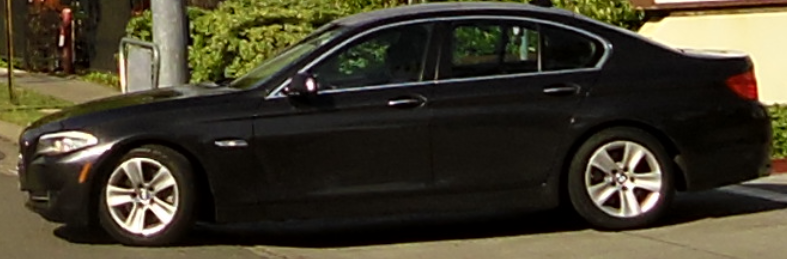

In [3]:
from IPython.display import Image
Image(filename=sample_car_image) 

In [4]:
! $OPENVINO_EXAMPLES_BIN/classification_sample -i /home/upsquared/intel/computer_vision_sdk_2018.1.265/deployment_tools/demo/car.png -m /home/upsquared/labs/smart-video-workshop/hardware-heterogeneity/object-detection/squeezenet1.1.xml

[ INFO ] InferenceEngine: 
	API version ............ 1.0
	Build .................. 10478
[ INFO ] Parsing input parameters
[ INFO ] Loading plugin

	API version ............ 1.0
	Build .................. lnx_20180314
	Description ....... MKLDNNPlugin
[ INFO ] Loading network files:
	/home/upsquared/labs/smart-video-workshop/hardware-heterogeneity/object-detection/squeezenet1.1.xml
	/home/upsquared/labs/smart-video-workshop/hardware-heterogeneity/object-detection/squeezenet1.1.bin
[ INFO ] Preparing input blobs
[ WARNING ] Image is resized from (787, 259) to (227, 227)
[ INFO ] Batch size is 1
[ INFO ] Preparing output blobs
[ INFO ] Loading model to the plugin
[ INFO ] Starting inference (1 iterations)
[ INFO ] Average running time of one iteration: 179.784 ms
[ INFO ] Processing output blobs

Top 10 results:

Image /home/upsquared/intel/computer_vision_sdk_2018.1.265/deployment_tools/demo/car.png

817 0.8363336 label #817
511 0.0946490 label #511
479 0.0419133 label #479
751 0.0091072